In [9]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('turnstile_160702.txt')

FileNotFoundError: File b'turnstile_160702.txt' does not exist

In [ ]:
df.head()

In [ ]:
gb = df.groupby(['C/A', 'UNIT', 'SCP','STATION'])

In [ ]:
db = df.set_index(['C/A', 'UNIT', 'SCP','STATION'])
db

In [ ]:
keys = db.index.values.tolist()

In [ ]:
final = db.to_dict(orient='split')
final

In [ ]:
from collections import defaultdict
import csv
from datetime import datetime

with open('turnstile_160702.txt') as f:
    reader = csv.reader(f)
    groupings = defaultdict(list)
    for row in reader:
        t = (row[0], row[1], row[2], row[3] )
        r = [e.strip for e in row[4:]]
        groupings[t].append(r)

In [6]:
from collections import defaultdict
import csv
from datetime import datetime

DATE_FORMAT = '%m/%d/%Y %H:%M:%S'
with open('turnstile_160702.txt') as f:
    reader = csv.reader(f)
    data = list(reader)
    dates = defaultdict(list)
    for i in range(1, len(data)):
        row = data[i]       
        t = (row[0], row[1], row[2], row[3])
        dts = str(row[6]) + ' ' + str(row[7])
        date = datetime.strptime(dts, DATE_FORMAT)
        entries = int(row[9])
        r = [date, entries]
        dates[t].append(r)


In [88]:
from collections import defaultdict
import csv
from datetime import datetime

path = '/Users/aleksandra/ds/metis/metisgh/metis_projects/mta_project/Project-Benson/data_mta/'

DATE_FORMAT = '%m/%d/%Y'
entries_per_day = {}
for filename in os.listdir(path):
    with open(path+str(filename)) as f:
        reader = csv.reader(f)
        data = list(reader)  
    date_and_entries = defaultdict(list)
    for i in range(1, len(data)):
        row = data[i]    
        dts = str(row[6])
        date = datetime.strptime(dts, DATE_FORMAT)
        t = (row[0], row[1], row[2], row[3], date)
        date_and_entries[t].append(int(row[9]))
        i = 0
    for k, v in date_and_entries.items():
        key = k[:-1]
        maxim = sorted(v)[-1] 
        minim = sorted(v)[0]
        value = [k[-1], maxim - minim]
        entries_per_day[key] = value

In [90]:
len(entries_per_day)

4631

In [91]:
entries_per_day

{('A002', 'R051', '02-00-00', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  1537],
 ('A002', 'R051', '02-00-01', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  1362],
 ('A002', 'R051', '02-03-00', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  959],
 ('A002', 'R051', '02-03-01', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  0],
 ('A002', 'R051', '02-03-02', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  1899],
 ('A002', 'R051', '02-03-03', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  1449],
 ('A002', 'R051', '02-03-04', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  1696],
 ('A002', 'R051', '02-03-05', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  2563],
 ('A002', 'R051', '02-03-06', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  2304],
 ('A002', 'R051', '02-05-00', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  0],
 ('A002', 'R051', '02-05-01', '59 ST'): [datetime.datetime(2016, 9, 23, 0, 0),
  0],
 ('A002', 'R051', '02-06-00', '59 ST'): [d

In [92]:
% matplotlib inline

4631
4631
4631


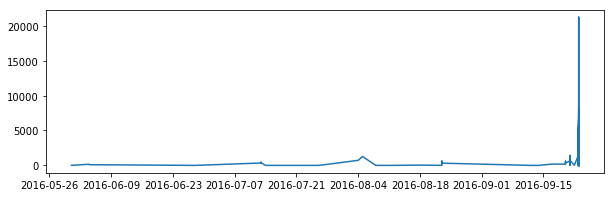

In [93]:
# challenge 4

import matplotlib.pyplot as plt

dates_counts = [v for k,v in entries_per_day.items()]
dates_counts.sort(key=lambda x: x[0])

dates= [e[0] for e in dates_counts]

counts = [e[1] for e in dates_counts]


plt.figure(figsize=(10,3))
plt.plot(dates,counts)

# this looks weird...

In [58]:
# open all files and create one big df:

import os
import pandas as pd
from datetime import datetime
from collections import defaultdict
import numpy as np

def read_data(path):
    '''opens all txt files in the given directory and creates a df'''
    all_data = pd.DataFrame()
    for filename in os.listdir(path):
        with open(path+str(filename)) as f:
            df = pd.read_csv(f)
            all_data = all_data.append(df)
    all_data.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME','DESC', 'ENTRIES', 'EXITS']
    return all_data
        
def save_as_csv(df, path):
    '''saves df in given directory'''
    df.to_csv(path+'all_data.csv')
    


In [59]:
all_data = read_data('/Users/aleksandra/ds/metis/metisgh/metis_projects/mta_project/data_mta/')


In [60]:
all_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,05/28/2016,00:00:00,REGULAR,5682962,1924340
1,A002,R051,02-00-00,59 ST,NQR456,BMT,05/28/2016,04:00:00,REGULAR,5683000,1924347
2,A002,R051,02-00-00,59 ST,NQR456,BMT,05/28/2016,08:00:00,REGULAR,5683030,1924381
3,A002,R051,02-00-00,59 ST,NQR456,BMT,05/28/2016,12:00:00,REGULAR,5683175,1924474
4,A002,R051,02-00-00,59 ST,NQR456,BMT,05/28/2016,16:00:00,REGULAR,5683437,1924533


In [64]:
# get number of entries per station in the overal period

def transit_per_station(all_data):
    '''Get number of people going through a station for the whole period of time considered. Returns dict with
    station: transit'''
    station_transit = {}
    for station in all_data.STATION.unique():
        df = all_data.loc[all_data['STATION'] == station]
        entries = df.ENTRIES
        exits = df['EXITS']
        saldo_entries = entries.max() - entries.min()       
        saldo_exits = exits.max() - exits.min()
        transit = saldo_entries + saldo_exits
        station_transit[station] = transit
    return station_transit

trans_stat = transit_per_station(all_data)


In [65]:
trans_stat

{'1 AV': 2965803668,
 '103 ST': 537223077,
 '103 ST-CORONA': 35334286,
 '104 ST': 3933396577,
 '110 ST': 21160579,
 '111 ST': 67108621,
 '116 ST': 2902477233,
 '116 ST-COLUMBIA': 1388425789,
 '121 ST': 153966472,
 '125 ST': 3504106431,
 '135 ST': 134235850,
 '137 ST CITY COL': 1472710417,
 '138/GRAND CONC': 1943001863,
 '14 ST': 2740417175,
 '14 ST-UNION SQ': 776854284,
 '145 ST': 2097608040,
 '149/GRAND CONC': 387323441,
 '14TH STREET': 3163176,
 '15 ST-PROSPECT': 104642819,
 '155 ST': 12904438,
 '157 ST': 26248082,
 '161/YANKEE STAD': 2496851864,
 '163 ST-AMSTERDM': 2616060992,
 '167 ST': 2634497972,
 '168 ST': 72276289,
 '169 ST': 16437581,
 '170 ST': 3004235611,
 '174 ST': 989505423,
 '174-175 STS': 5417253,
 '175 ST': 123448060,
 '176 ST': 10287311,
 '18 AV': 2481911351,
 '18 ST': 939870316,
 '181 ST': 453209950,
 '182-183 STS': 19146445,
 '183 ST': 3640266483,
 '190 ST': 15287033,
 '191 ST': 17271394,
 '2 AV': 89889927,
 '20 AV': 13573230,
 '207 ST': 135518625,
 '21 ST': 5347877,

In [70]:
db = all_data.set_index(['C/A', 'UNIT', 'SCP','STATION'])


SyntaxError: invalid syntax (<ipython-input-70-d78b1835f1f4>, line 2)

In [73]:
import numpy as np
list_of_turnstiles = np.unique(db.index.values).tolist()

In [80]:
station_transit = defaultdict(int)
for turnstile in list_of_turnstiles:
    turndf = db.loc[turnstile]
    entries = turndf.ENTRIES
    exits = turndf['EXITS']
    saldo_entries = entries.max() - entries.min()       
    saldo_exits = exits.max() - exits.min()
    transit = saldo_entries + saldo_exits
    station_transit[turnstile[3]] += transit

//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()


In [81]:
station_transit

defaultdict(int,
            {'1 AV': 2168188021,
             '103 ST': 5452422,
             '103 ST-CORONA': 3729012,
             '104 ST': 3026072625,
             '110 ST': 2222079,
             '111 ST': 2758118,
             '116 ST': 23311859,
             '116 ST-COLUMBIA': 2089813,
             '121 ST': 455517,
             '125 ST': 137156716,
             '135 ST': 5156755,
             '137 ST CITY COL': 454014240,
             '138/GRAND CONC': 657016,
             '14 ST': 29270918,
             '14 ST-UNION SQ': 529570574,
             '145 ST': 7201321,
             '149/GRAND CONC': 2165323,
             '14TH STREET': 4361547,
             '15 ST-PROSPECT': 872859,
             '155 ST': 1148799,
             '157 ST': 5792441,
             '161/YANKEE STAD': 892661292,
             '163 ST-AMSTERDM': 607068,
             '167 ST': 87761275,
             '168 ST': 4600609,
             '169 ST': 1610381,
             '170 ST': 3355033,
             '174 ST': 140815

In [79]:
list_of_turnstiles


[('A002', 'R051', '02-00-00', '59 ST'),
 ('A002', 'R051', '02-00-01', '59 ST'),
 ('A002', 'R051', '02-03-00', '59 ST'),
 ('A002', 'R051', '02-03-01', '59 ST'),
 ('A002', 'R051', '02-03-02', '59 ST'),
 ('A002', 'R051', '02-03-03', '59 ST'),
 ('A002', 'R051', '02-03-04', '59 ST'),
 ('A002', 'R051', '02-03-05', '59 ST'),
 ('A002', 'R051', '02-03-06', '59 ST'),
 ('A002', 'R051', '02-05-00', '59 ST'),
 ('A002', 'R051', '02-05-01', '59 ST'),
 ('A002', 'R051', '02-06-00', '59 ST'),
 ('A006', 'R079', '00-00-00', '5 AV/59 ST'),
 ('A006', 'R079', '00-00-01', '5 AV/59 ST'),
 ('A006', 'R079', '00-00-02', '5 AV/59 ST'),
 ('A006', 'R079', '00-00-03', '5 AV/59 ST'),
 ('A006', 'R079', '00-00-04', '5 AV/59 ST'),
 ('A006', 'R079', '00-03-00', '5 AV/59 ST'),
 ('A006', 'R079', '00-03-01', '5 AV/59 ST'),
 ('A006', 'R079', '00-03-02', '5 AV/59 ST'),
 ('A007', 'R079', '01-05-00', '5 AV/59 ST'),
 ('A007', 'R079', '01-05-01', '5 AV/59 ST'),
 ('A007', 'R079', '01-06-00', '5 AV/59 ST'),
 ('A007', 'R079', '01-06-

In [82]:
def transit_per_station(all_data):
    '''Get number of people going through a station for the whole period of time considered. Returns dict with
    station: transit'''
    # tries to take into account single turnstiles
    db = all_data.set_index(['C/A', 'UNIT', 'SCP','STATION'])
    list_of_turnstiles = np.unique(db.index.values).tolist()
    station_transit = defaultdict(int)
    for turnstile in list_of_turnstiles:
        turndf = db.loc[turnstile]
        entries = turndf.ENTRIES
        exits = turndf['EXITS']
        saldo_entries = entries.max() - entries.min()       
        saldo_exits = exits.max() - exits.min()
        transit = saldo_entries + saldo_exits
        station_transit[turnstile[3]] += transit
    return station_transit